# Assignment 1  - Melbourne Housing Dataset

Practice Loading in Data  (20 Points)

Please see the CANVAS system for the due date of this assignment. 

## Add YOUR NAME/S HERE !

- Student Name: Christopher Calizzi
- Student UT EID: CSC3322

In [1]:
# Imports first on top 
import pandas as pd
import matplotlib.pyplot as plt

First of all, we load the data from a CSV file into the manin memory in a Pandas Dataframe format. 

In [8]:
melbourne_data = pd.read_csv("https://github.com/kiat/Elements-of-Data-Analytics/blob/main/datasets/airline/HoustonAirline.csv?raw=true")

melbourne_data

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0       2008      1           4          5   1910.0        1910   2025.0   
1       2008      1           4          5   1345.0        1345   1453.0   
2       2008      1           4          5    736.0         735    839.0   
3       2008      1           4          5   1603.0        1550   1647.0   
4       2008      1           4          5   2105.0        2105   2151.0   
...      ...    ...         ...        ...      ...         ...      ...   
241100  2008     12          12          5   1122.0        1040   1418.0   
241101  2008     12          12          5    546.0         545   1011.0   
241102  2008     12          12          5   1114.0        1050   1406.0   
241103  2008     12          13          6   1612.0        1614   1910.0   
241104  2008     12          13          6   1222.0        1050   1519.0   

        CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0             2025            WN        823  ...    6.0     11.0          0   
1             1500            WN        901  ...    3.0     14.0          0   
2              850            WN        957  ...    3.0      9.0          0   
3             1635            WN        231  ...    5.0     10.0          0   
4             2150            WN        570  ...    7.0     11.0          0   
...            ...           ...        ...  ...    ...      ...        ...   
241100        1342            DL         50  ...    9.0     15.0          0   
241101         849            DL        668  ...   16.0     86.0          0   
241102        1349            DL       1292  ...   11.0      8.0          0   
241103        1919            DL          8  ...   16.0     18.0          0   
241104        1346            DL         50  ...   11.0     19.0          0   

        CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0                    NaN         0           NaN          NaN      NaN   
1                    NaN         0           NaN          NaN      NaN   
2                    NaN         0           NaN          NaN      NaN   
3                    NaN         0           NaN          NaN      NaN   
4                    NaN         0           NaN          NaN      NaN   
...                  ...       ...           ...          ...      ...   
241100               NaN         0           3.0          0.0      0.0   
241101               NaN         0           0.0          0.0     82.0   
241102               NaN         0           3.0          0.0      0.0   
241103               NaN         0           NaN          NaN      NaN   
241104               NaN         0           0.0          0.0      1.0   

        SecurityDelay  LateAircraftDelay  
0                 NaN                NaN  
1                 NaN                NaN  
2                 NaN                NaN  
3                 NaN                NaN  
4                 NaN                NaN  
...               ...                ...  
241100            0.0               33.0  
241101            0.0                0.0  
241102            0.0               14.0  
241103            NaN                NaN  
241104            0.0               92.0  

[241105 rows x 29 columns]

## Q1 - How many unique suburbs are there? (2 points)

In [5]:
len(melbourne_data['Suburb'].unique())

314

## Q2 - How many unique properties are there? (2 points)

In [8]:
len(melbourne_data['Address'].unique())

13378

## Q3- What is the mean price of a property in the Kensington suburb? (2 points)

In [48]:
kensington = melbourne_data[melbourne_data['Suburb']=='Kensington']
kensington['Price'].mean()


831667.4358974359

# Q3.1 (extra) - What is the median price of a property in the Kensington suburb? (1 extra point)

In [49]:
kensington = melbourne_data[melbourne_data['Suburb']=='Kensington']
kensington['Price'].median()

812000.0

## Q4 - What percentage of properties contain a YearBuilt value? (2 points)

As we see in the table, we do not have for each house the "YearBuild" value and some of them are NaN and not filled. 
We want to find out the percentage of homes that we know their build year. 

In [18]:
numNaN = len(melbourne_data[melbourne_data['YearBuilt'].isna()])
(len(melbourne_data)-numNaN)/len(melbourne_data)*100

60.41973490427098

## Q5 - Create a histogram plot that shows the data distribution of the Landsizes using a bin size of 20. (2 points)

Describe the shape of this histogram plot and your interpretations in one paragraph. 

<AxesSubplot:ylabel='Frequency'>

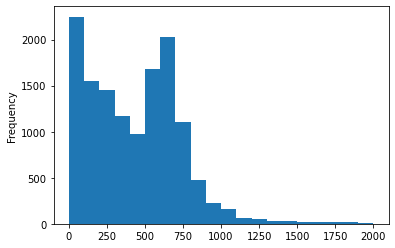

In [29]:
under2k = melbourne_data[melbourne_data['Landsize']<=2000]
under2k['Landsize'].plot.hist(bins = 20)

The histogram shows a bimodal distribution of landsizes that has peaks near 0 and 650. The data is heavily right skewed. Because it is not possible for 

## Q6 -  Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value. (2 points)

Create a scatter plot that has BuildingArea as x-axis and Price as y-axis.

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

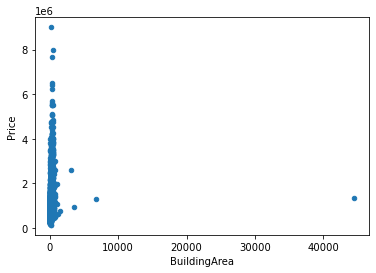

In [30]:
build_valid = melbourne_data[melbourne_data['BuildingArea'].notna() and melbourne_data['BuildingArea']<=]
build_valid.plot.scatter(x = 'BuildingArea', y = 'Price')

## Q7 - Who are the top-10 seller/listing agents? And what percentage of properties they have listed? (2 points)  

Seller/Listing agents are identified by the "SellerG" column. 

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  
So, that column is interpreted as the seller that listed the property.

In [52]:
topten = melbourne_data['SellerG'].value_counts().nlargest(10)
topten/len(melbourne_data)*100

Nelson           11.524300
Jellis            9.690722
hockingstuart     8.593520
Barry             7.444772
Ray               5.162003
Marshall          4.852725
Buxton            4.653903
Biggin            2.893962
Brad              2.518409
Fletchers         2.216495
Name: SellerG, dtype: float64

## Q8 - Fix a problem. (2 points)
Your boss has told you that the number of rooms was calculated incorrectly systematically across the entire dataset.  

Solve this problem without using a python for look, and using a single pandas statemnt. 

Show your output dataset!

In [44]:
melbourne_data['Rooms'] = melbourne_data['Rooms'] + 1
melbourne_data

Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      3    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      3    h  1035000.0      S   
2         Abbotsford      5 Charles St      4    h  1465000.0     SP   
3         Abbotsford  40 Federation La      4    h   850000.0     PI   
4         Abbotsford       55a Park St      5    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      5    h  1245000.0      S   
13576   Williamstown     77 Merrett Dr      4    h  1031000.0     SP   
13577   Williamstown       83 Power St      4    h  1170000.0      S   
13578   Williamstown      96 Verdon St      5    h  2500000.0     PI   
13579     Yarraville        6 Agnes St      5    h  1285000.0     SP   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0   
1        Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0   
2        Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0   
3        Biggin   4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0   
4        Nelson   4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0   
...         ...         ...       ...       ...  ...       ...  ...       ...   
13575     Barry  26/08/2017      16.7    3150.0  ...       2.0  2.0     652.0   
13576  Williams  26/08/2017       6.8    3016.0  ...       2.0  2.0     333.0   
13577     Raine  26/08/2017       6.8    3016.0  ...       2.0  4.0     436.0   
13578   Sweeney  26/08/2017       6.8    3016.0  ...       1.0  5.0     866.0   
13579   Village  26/08/2017       6.3    3013.0  ...       1.0  1.0     362.0   

       BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0               NaN        NaN        Yarra -37.79960   144.99840   
1              79.0     1900.0        Yarra -37.80790   144.99340   
2             150.0     1900.0        Yarra -37.80930   144.99440   
3               NaN        NaN        Yarra -37.79690   144.99690   
4             142.0     2014.0        Yarra -37.80720   144.99410   
...             ...        ...          ...       ...         ...   
13575           NaN     1981.0          NaN -37.90562   145.16761   
13576         133.0     1995.0          NaN -37.85927   144.87904   
13577           NaN     1997.0          NaN -37.85274   144.88738   
13578         157.0     1920.0          NaN -37.85908   144.89299   
13579         112.0     1920.0          NaN -37.81188   144.88449   

                       Regionname Propertycount  
0           Northern Metropolitan        4019.0  
1           Northern Metropolitan        4019.0  
2           Northern Metropolitan        4019.0  
3           Northern Metropolitan        4019.0  
4           Northern Metropolitan        4019.0  
...                           ...           ...  
13575  South-Eastern Metropolitan        7392.0  
13576        Western Metropolitan        6380.0  
13577        Western Metropolitan        6380.0  
13578        Western Metropolitan        6380.0  
13579        Western Metropolitan        6543.0  

[13580 rows x 21 columns]

## Q9 - What is the Address of the earliest built house in this dataset? (2 points)


In [56]:
smallest = melbourne_data['YearBuilt'].min()
melbourne_data[melbourne_data['YearBuilt']==smallest]['Address'].values[0]


'5 Armstrong St'

## Q10 - Save a file  (2 points)
The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrcitions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the counsil person.  

Export the file with only the allowed columns, and do not write and index column.

In [60]:
melbourne = melbourne_data[melbourne_data['CouncilArea'] == 'Melbourne']
melbourne[['Suburb','Price','Date']].to_csv(index = False)

'Suburb,Price,Date\nFlemington,957000.0,22/05/2016\nKensington,785000.0,3/09/2016\nKensington,852000.0,3/09/2016\nKensington,1037000.0,3/09/2016\nKensington,775000.0,3/12/2016\nKensington,1470000.0,4/03/2017\nKensington,630000.0,4/03/2017\nKensington,492500.0,4/06/2016\nKensington,420000.0,4/06/2016\nKensington,650000.0,4/06/2016\nKensington,1050000.0,4/06/2016\nKensington,1291000.0,6/08/2016\nKensington,420000.0,6/08/2016\nKensington,961000.0,7/05/2016\nKensington,1271000.0,7/05/2016\nKensington,1010000.0,7/05/2016\nKensington,750000.0,7/05/2016\nKensington,1675000.0,7/05/2016\nKensington,905000.0,8/10/2016\nKensington,960000.0,8/10/2016\nKensington,1031000.0,8/10/2016\nKensington,918000.0,8/10/2016\nKensington,870000.0,8/10/2016\nKensington,1165000.0,10/09/2016\nKensington,1710000.0,10/09/2016\nKensington,360000.0,10/12/2016\nKensington,1455000.0,10/12/2016\nKensington,365000.0,10/12/2016\nKensington,551000.0,10/12/2016\nKensington,442000.0,10/12/2016\nKensington,765000.0,10/12/2016\